In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format  

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


In [279]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [280]:
df=pd.read_csv('./datasets/원본data.csv',index_col=0)

In [281]:
df.shape

(184, 22)

In [282]:
dataset=df.values
scaler=StandardScaler()
dataset= scaler.fit_transform(dataset)
print(dataset)

[[ 0.93589755  1.43327182 -0.74157178 ... -0.82491373 -1.74913464
  -1.49457805]
 [ 0.80523213  1.42294476 -0.75485022 ... -0.57680883 -1.57284691
  -1.75012721]
 [ 0.7220814   1.26803893 -0.75485022 ... -0.07876798 -1.33988349
  -1.81061445]
 ...
 [-1.58238152 -0.73540982  0.37381684 ...  0.44444956  1.76937084
  -0.3938106 ]
 [-1.61801754 -0.73540982 -0.40961088 ...  0.01064744  1.4817088
  -0.27075728]
 [-1.66553224 -0.61148516 -0.3432187  ...  0.50731501  1.95422583
  -0.27316174]]


In [283]:
# dataset =df.values
# data_mean = dataset[:148].mean(axis=0)
# data_std = dataset[:148].std(axis=0)
# dataset = (dataset-data_mean)/data_std
# print(dataset)

In [284]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)



- dataset: 입력으로 사용될 다변량 시계열 데이터. 이는 2D 배열 또는 리스트로 표현됩니다.
- target: 예측하고자 하는 값 또는 시계열 데이터의 특정 특징(feature). 이는 1D 배열 또는 리스트로 표현됩니다.
- start_index: 데이터에서 입력 시퀀스의 시작 인덱스입니다.
- end_index: 데이터에서 입력 시퀀스의 종료 인덱스입니다. 만약 None으로 설정되면, 데이터의 끝에서 target_size를 뺀 값으로 설정됩니다.
- history_size: 입력으로 사용할 이전 시점들의 크기입니다. 이 값은 현재 시점을 포함하지 않습니다.
- target_size: 예측하고자 하는 미래 시점들의 크기입니다.
- step: 입력 시퀀스를 만들기 위해 사용할 간격(step)입니다.
- single_step: 예측할 시계열 데이터가 단일 시점인지 여부를 나타냅니다. 기본값은 False이며, 다변량 시계열을 예측하는 경우 False로 설정되어야 합니다.

In [285]:
past_history = 2
future_target = 1
STEP = 1

X_train, y_train = multivariate_data(dataset, dataset[:, -1], 0, 148, past_history,
                                                   future_target, STEP, single_step=False)
X_test, y_test = multivariate_data(dataset, dataset[:, -1], 148, None, past_history,
                                               future_target, STEP, single_step=False)

print('Single window of past history : {}'.format(X_train[0].shape))

Single window of past history : (2, 22)


In [286]:
X_train.shape

(146, 2, 22)

In [287]:
X_test.shape

(33, 2, 22)

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.3))
model.add(LSTM(50,dropout=0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)




Epoch 1/200
3/3 [==============================] - 4s 5ms/step - loss: 1.1228
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 1.0529
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 0.9636
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 0.8934
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.8200
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 0.7060
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 0.6413
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5210
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4207
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3380
Epoch 11/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2661
Epoch 12/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2200
Epoch 13/200
3/3 [==============================] - 0s 5ms/st

In [289]:
# 예측
train_predict = model.predict(X_train)
val_predict = model.predict(X_test)

scaler_y = StandardScaler()
scaled_data_y = scaler_y.fit_transform(df.iloc[:, -1].values.reshape(-1,1))
# 예측 값 스케일 역변환
train_predict = scaler_y.inverse_transform(train_predict)
val_predict = scaler_y.inverse_transform(val_predict)

# 실제 값 스케일 역변환
y_train = scaler_y.inverse_transform(y_train.reshape(-1,1))
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1))

2/2 [==============================] - 0s 4ms/step


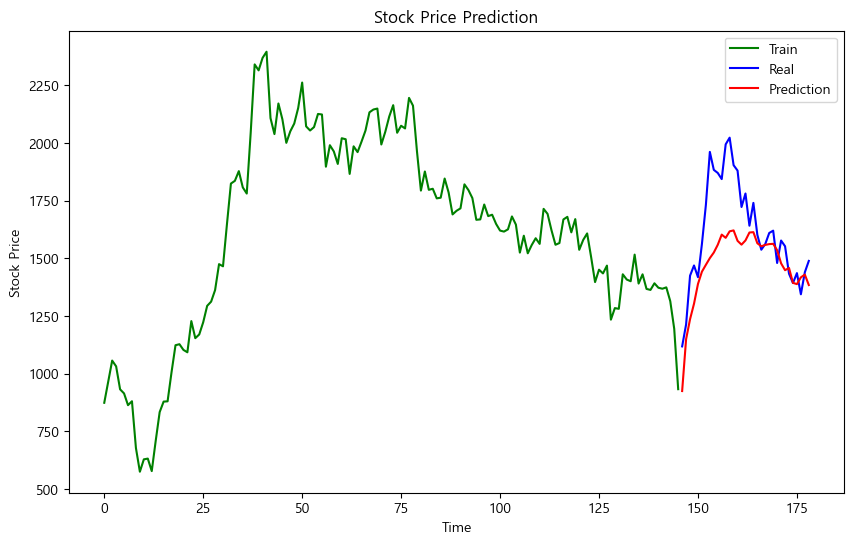

In [290]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Add the training set to the plot:
plt.plot(y_train, color='green', label='Train')
# Plot the test and prediction data:
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test, color='blue', label='Real')
plt.plot(range(len(y_train), len(y_train)+len(y_test)), val_predict, color='red', label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
